In [5]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from heapq import nlargest
import matplotlib.colors as colors
from infomap import Infomap

## 1.

In [6]:
edges = pd.read_csv('connections.txt', delimiter=' ')
edges.head()

,0,1
0,0,2
1,0,3
2,0,4
3,0,5
4,0,6


In [7]:
# Creating a directed graph
G = nx.DiGraph()
# adding the edges to the graph based on the connectivity data
G.add_edges_from(np.array(edges))

## 2.

The bridge in a network can be considered the edge that, if removed, will increase the number of disconnected components in the graph/network. So, the bridge is an edge that plays a crucial role in conecting the graph. Therefore, to identify the bridges we can just find the edges with the highest edge betweenness. 

In [13]:
# Taking the edges of the graph
edge_dict = G.edges()
# Getting the Edge Betweenness of the edges
edge_betwenness = nx.edge_betweenness_centrality(G).items()
# Sorting the values in descending order and taking the top 5
top5_eb=sorted(edge_betwenness, key=lambda pair: pair[1], reverse=True)[0:5]
top5_edges=[i[0] for i in top5_eb]

In [27]:
top5_values = [i[1] for i in top5_eb]

In [28]:
for i in range(5):
    print(f"Edge {top5_edges[i]}: with score {top5_values[i]}")

Edge (1718, 1912): with score 0.016003948081785162
Edge (1656, 1684): with score 0.008509211094304265
Edge (1405, 1684): with score 0.00846593937470497
Edge (567, 3437): with score 0.0077122621061784784
Edge (563, 1912): with score 0.006869300449831124


## 3.

In [16]:
density = nx.density(G)
print("Graph Density:", density)

Graph Density: 0.005409920437693852


Density is a measure ranging from 0 to 1, which shows how interconnected the nodes are. 0 => no connection, 1 => fully connected. For our graph we have a pretty small value, therefore we have a low interconnectedness between the edges. 

## 4.

In [50]:
# Number of connections = degrees
# Calculate the total degree for each node
degrees = G.degree()

# Find nodes with the highest and lowest degrees
# sorting the degrees in descending order, taking the 5 most connected nodes
highest_degree_nodes = sorted(degrees, key=lambda x: x[1], reverse = True)[0:5]
# sorting in ascending order taking the 5 least connected nodes
lowest_degree_nodes = sorted(degrees, key=lambda x: x[1])[0:5]
for i in range(5):
    print(f"Nodes with the highest degree:, {highest_degree_nodes[i][0]}, Degree : {highest_degree_nodes[i][1]}")
print("===================================================")
for i in range(5):    
    print(f"Nodes with the lowest degree:, {lowest_degree_nodes[i][0]}, Degree: {lowest_degree_nodes[i][1]}")

Nodes with the highest degree:, 107, Degree : 1045
Nodes with the highest degree:, 1684, Degree : 792
Nodes with the highest degree:, 1912, Degree : 755
Nodes with the highest degree:, 3437, Degree : 547
Nodes with the highest degree:, 0, Degree : 346
Nodes with the lowest degree:, 11, Degree: 1
Nodes with the lowest degree:, 12, Degree: 1
Nodes with the lowest degree:, 15, Degree: 1
Nodes with the lowest degree:, 18, Degree: 1
Nodes with the lowest degree:, 37, Degree: 1


## 5.

In [55]:
# Calculate the in-degree and out-degree for each node
in_degrees = G.in_degree()
out_degrees = G.out_degree()

# Find nodes with the highest in-degree and out-degree
highest_in_degree_node = max(in_degrees, key=lambda x: x[1])
highest_out_degree_node = max(out_degrees, key=lambda x: x[1])

print(f"Node with the highest in-degree: {highest_in_degree_node[0]}   Degree: {highest_in_degree_node[1]}")
print(f"Node with the highest out-degree: {highest_out_degree_node[0]}   Degree: {highest_out_degree_node[1]}")

Node with the highest in-degree: 1888   Degree: 251
Node with the highest out-degree: 107   Degree: 1043


## 6.

In [62]:
# Calculate the centrality measures
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter = 400)

# Find nodes with the highest centrality measures
highest_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
highest_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
highest_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

In [65]:
b=betweenness_centrality[highest_betweenness_node]
c=closeness_centrality[highest_closeness_node]
e=eigenvector_centrality[highest_eigenvector_node]

In [67]:
print("Node with the highest closeness centrality:{} Closeness:{}".format(highest_closeness_node,c))
print("Node with the highest betweenness centrality:{} Betweenness:{}".format(highest_betweenness_node, b))
print("Node with the highest eigenvector centrality:{} Eigen Vector:{}".format(highest_eigenvector_node, e))

Node with the highest closeness centrality:2642 Closeness:0.11797503012816456
Node with the highest betweenness centrality:1684 Betweenness:0.03299985344063623
Node with the highest eigenvector centrality:2655 Eigen Vector:0.80270217763289


We can see that the node with the highest centrality is 2642, which means that this node is the closest to all other nodes in the network, it has shorter average distance to the other nodes. In terms of the influence, this node can quickly transfer information to other nodes and influence them in a short time.\
For the betweenness measure the node 1684 is on the top, which means that the node has lies between the most shortest paths in the network. This means that it acts as a bridge and can control the flow of information between the different parts of the netwrok. \
The node with the highest eigenvector centrality measure is 2655. It is the most connected to other important nodes in the network => they are influential

## 7.

We will use infomap as Girvan-Newman has a high computational cost

In [69]:
def findCommunities(G):
    im = Infomap("--two-level --directed")
    print("Building Infomap network from a NetworkX graph...")
    for e in G.edges():
        im.addLink(*e)
    print("Find communities with Infomap...")
    im.run();
    print("Found {0} communities with codelength: {1}".format(im.num_top_modules,im.codelength))
    communities = {}
    for node in im.tree:
        communities[node.node_id] = node.module_id
    nx.set_node_attributes(G, communities,'community')
    return im.num_top_modules

In [70]:
findCommunities(G)

Building Infomap network from a NetworkX graph...
Find communities with Infomap...
Found 97 communities with codelength: 6.588171970047718


97

Theree were 97 communities found among our network.

## 8.

Let's modify the previous function so it also returns the communities

In [71]:
def findCommunities_new(G):
    im = Infomap("--two-level --directed")
    print("Building Infomap network from a NetworkX graph...")
    for e in G.edges():
        im.addLink(*e)
    print("Find communities with Infomap...")
    im.run()
    print("Found {0} communities with codelength: {1}".format(im.num_top_modules, im.codelength))
    communities = {}
    for node in im.tree:
        communities[node.node_id] = node.module_id
    nx.set_node_attributes(G, communities, 'community')
    return im.num_top_modules, communities


In [74]:
# Call the function to find communities
num_communities, communities = findCommunities_new(G)

# Count the nodes in each community
community_sizes = {}
for node, community_id in communities.items():
    community_sizes[community_id] = community_sizes.get(community_id, 0) + 1

# Find the largest and smallest community
largest_community_id = max(community_sizes, key=community_sizes.get)
smallest_community_id = min(community_sizes, key=community_sizes.get)

# Get the number of nodes in the largest and smallest communities
largest_community_size = community_sizes[largest_community_id]
smallest_community_size = community_sizes[smallest_community_id]

print("Largest Community:", largest_community_id)
print("Largest Community Size:", largest_community_size)
print("Smallest Community:", smallest_community_id)
print("Smallest Community Size:", smallest_community_size)

Building Infomap network from a NetworkX graph...
Find communities with Infomap...
Found 97 communities with codelength: 6.588171970047718
Largest Community: 5
Largest Community Size: 433
Smallest Community: 37
Smallest Community Size: 2


## 9.

In [82]:
# Sort the communities based on their sizes in descending order
sorted_communities = sorted(community_sizes.items(), key=lambda x: x[1], reverse=True)

# Select the largest three communities
largest_communities = sorted_communities[:3]

In [98]:
for i in range(len(largest_communities)):
    print(f'Community {largest_communities[i][0]}: Nodes {largest_communities[i][1]}')

Community 5: Nodes 433
Community 2: Nodes 342
Community 3: Nodes 271


The largest communities are 5,2, and 3.

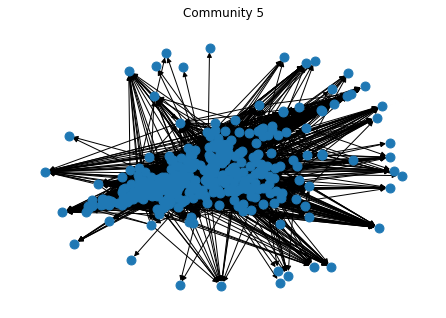

In [100]:
selected_data5 = dict((n,d['community']) for n,d in G.nodes().items() if d['community'] == 5)
sg5=G.subgraph(list(selected_data5.keys()))
pos5 = nx.spring_layout(sg5, seed=5656)
nx.draw(sg5, pos=pos5, node_size = 80)
plt.title("Community 5")
plt.show()

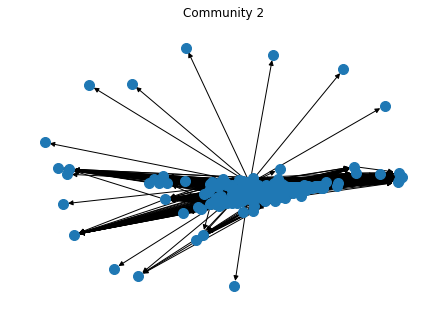

In [103]:
selected_data2 = dict((n,d['community']) for n,d in G.nodes().items() if d['community'] == 2)
sg2=G.subgraph(list(selected_data2.keys()))
pos2 = nx.spring_layout(sg2, seed=5656)
nx.draw(sg2, pos=pos2, node_size = 100)
plt.title("Community 2")
plt.show()

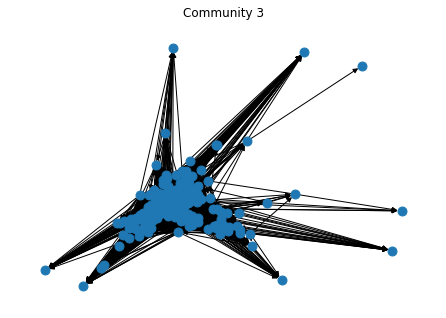

In [104]:
selected_data3 = dict((n,d['community']) for n,d in G.nodes().items() if d['community'] == 3)
sg3=G.subgraph(list(selected_data3.keys()))
pos3 = nx.spring_layout(sg3, seed=5656)
nx.draw(sg3, pos=pos3, node_size = 80)
plt.title("Community 3")
plt.show()

In [107]:
from operator import itemgetter

In [151]:
# A function that removes the top 3 nodes based on closeness, betweenness, and eigenvector
def remove_top3(sg):
    sg_copy = sg.copy()  # Create a copy of the graph

    betweenness_dict = nx.betweenness_centrality(sg_copy)
    nx.set_node_attributes(sg_copy, betweenness_dict, 'betweenness')
    sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
    top3b = [tup[0] for tup in sorted_betweenness][:3]

    closeness_dict = nx.closeness_centrality(sg_copy)
    nx.set_node_attributes(sg_copy, closeness_dict, 'closeness')
    sorted_closeness = sorted(closeness_dict.items(), key=itemgetter(1), reverse=True)
    top3c = [tup[0] for tup in sorted_closeness][:3]

    eigenvector_dict = nx.eigenvector_centrality(sg_copy, max_iter = 10000)
    nx.set_node_attributes(sg_copy, eigenvector_dict, 'eigenvector')
    sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)
    top3e = [tup[0] for tup in sorted_eigenvector][:3]
    top3 = list(set(top3c + top3b + top3e))

    sg_copy.remove_nodes_from(top3)

    return sg_copy

In [152]:
# getting the commmunities without the "influencers"
sg5_removed = remove_top3(sg5)
sg2_removed = remove_top3(sg2)
sg3_removed = remove_top3(sg3)

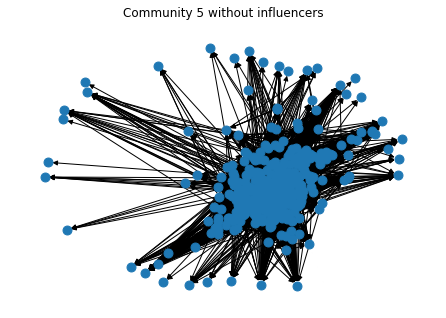

In [153]:
pos5_removed = nx.spring_layout(sg5_removed, seed=5656)
nx.draw(sg5_removed, pos=pos5_removed, node_size = 80)
plt.title("Community 5 without influencers")
plt.show()

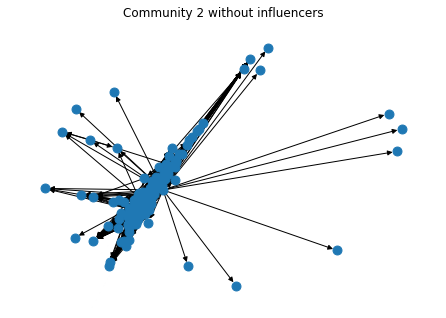

In [154]:
pos2_removed = nx.spring_layout(sg2_removed, seed=5656)
nx.draw(sg2_removed, pos=pos2_removed, node_size = 80)
plt.title("Community 2 without influencers")
plt.show()

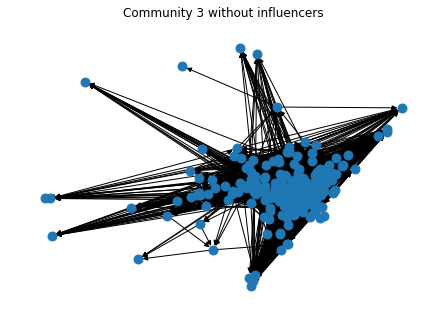

In [155]:
pos3_removed = nx.spring_layout(sg3_removed, seed=5656)
nx.draw(sg3_removed, pos=pos3_removed, node_size = 80)
plt.title("Community 3 without influencers")
plt.show()

## 10.

In [156]:
# A function that returns the top 3 nodes with closeness, betweenness, and eigenvector
def top3(sg):
    sg_copy = sg.copy()  # Create a copy of the graph

    betweenness_dict = nx.betweenness_centrality(sg_copy)
    nx.set_node_attributes(sg_copy, betweenness_dict, 'betweenness')
    sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
    top3b = [tup[0] for tup in sorted_betweenness][:3]

    closeness_dict = nx.closeness_centrality(sg_copy)
    nx.set_node_attributes(sg_copy, closeness_dict, 'closeness')
    sorted_closeness = sorted(closeness_dict.items(), key=itemgetter(1), reverse=True)
    top3c = [tup[0] for tup in sorted_closeness][:3]

    eigenvector_dict = nx.eigenvector_centrality(sg_copy, max_iter = 10000)
    nx.set_node_attributes(sg_copy, eigenvector_dict, 'eigenvector')
    sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)
    top3e = [tup[0] for tup in sorted_eigenvector][:3]
    top3 = list(set(top3c + top3b + top3e))

    return top3

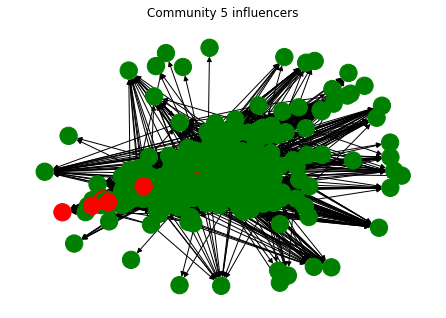

In [157]:
# Getting the influencers of Community 5
top3_in5 = top3(sg5)
# Creating a color map so the influencers are red in the graph and the others are green
color_map= ['red' if node in top3_in5 else 'green' for node in sg5]
pos5 = nx.spring_layout(sg5, seed=5656)
nx.draw(sg5,node_color=color_map, with_labels=False, pos=pos5)
plt.title("Community 5 influencers")
plt.show()

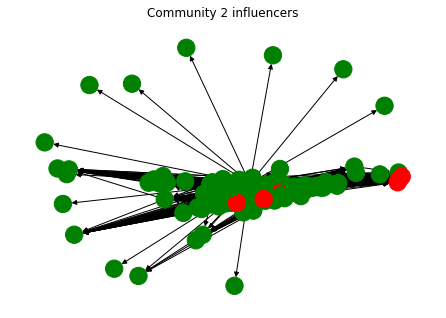

In [158]:
# Getting the influencers of Community 2
top3_in2 = top3(sg2)
# Creating a color map so the influencers are red in the graph and the others are green
color_map= ['red' if node in top3_in2 else 'green' for node in sg2]
pos2 = nx.spring_layout(sg2, seed=5656)
nx.draw(sg2,node_color=color_map, with_labels=False, pos=pos2)
plt.title("Community 2 influencers")
plt.show()

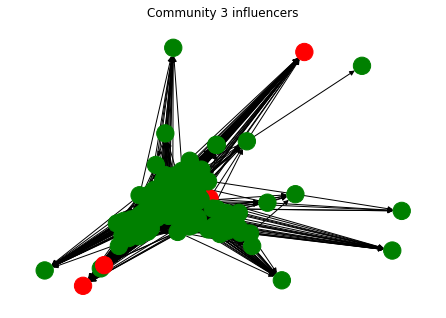

In [159]:
# Getting the influencers of Community 3
top3_in3 = top3(sg3)
# Creating a color map so the influencers are red in the graph and the others are green
color_map= ['red' if node in top3_in3 else 'green' for node in sg3]
pos3 = nx.spring_layout(sg3, seed=5656)
nx.draw(sg3,node_color=color_map, with_labels=False, pos=pos3)
plt.title("Community 3 influencers")
plt.show()

## 11.

a) Let's assume my hypothetical business is a fitness and nutrition app for receiving personalized reccomendations for a better and healthier lifestyle.\
b) Let's assume the marketing budget is \\$10000.\
c) Let's assume that tracking their nutrition and fitness goals is free, but getting personalized reccomendations is $15/month.\
d) If we are looking at the network as a whole, we can target only the people/nodes with the highest out-degrees as they have more connections to other people in order to spread the "news" about our app. Moreover, we should target the people with the highest cetrality measure. The people identified with the highest closeness centrality, betweenness centrality, and eigenvector centrality are considered important in different ways. The highest closeness centrality node is the most central in terms of shortest path lengths to other nodes. The highest betweenness centrality node lies on many shortest paths between other nodes, acting as a bridge. The highest eigenvector centrality node is influential due to its connections to other influential nodes. Therefore, understanding which people have high or low values can help identify key players and influential people, so by investing in a small amoutn of people we can spread our influence as wide as possible. \
Also, we can seperate our whole network into communities, select only the communities that have the desired characteristics of our potential customers. For example, the communities that prioritize healthy lifestyle, are vegan, or where there are a lot of gyms in the area. Then we can choose the biggest communities amongs those and target the top influencers of these communities based on their centrality measures.